## Análisis de Hiperparámetros para Ajedrez

En este notebook, analizaremos los datos proporcionados para determinar la mejor configuración de hiperparámetros para los jugadores de ajedrez, diferenciando entre las blancas y las negras.

### Lectura de datos

In [31]:
import pandas as pd

df = pd.read_csv('./result_mcts.csv')
df.head()

,simulations_number_whites,exploration_factor_whites,simulations_number_blacks,exploration_factor_blacks,average_time_whites,chess_pieces_whites,average_time_blacks,chess_pieces_blacks,result
0,100,1.0,100,0.0,0.950926,8.0,0.950926,3,Ganan blancas
1,100,1.0,100,0.0,1.017034,3.0,1.017034,6,Ganan blancas
2,100,1.0,100,0.0,1.089101,1.0,1.089101,6,Ganan negras
3,100,1.0,100,0.0,1.042461,3.0,1.042461,0,Ganan negras
4,100,1.0,100,0.0,1.067558,7.0,1.067558,3,Ganan blancas


### Visualización de datos

In [32]:
from math import sqrt

agentes = {
    1: {
        "simulations_number": 100,
        "exploration_factor": 1,
    },
    2: {
        "simulations_number": 100,
        "exploration_factor": 0,
    },
    3: {
        "simulations_number": 100,
        "exploration_factor": 0.5,
    },
    4: {
        "simulations_number": 200,
        "exploration_factor": 1 / sqrt(2),
        
    },
}

In [33]:
d = {}

for a in agentes:
    d['{}_whites'.format(a)] = df[(df['result'] == 'Ganan blancas') & (df['simulations_number_whites'] == agentes[a]['simulations_number']) & (df['exploration_factor_whites'] == agentes[a]['exploration_factor'])]
    d['{}_blacks'.format(a)] = df[(df['result'] == 'Ganan negras') & (df['simulations_number_blacks'] == agentes[a]['simulations_number']) & (df['exploration_factor_blacks'] == agentes[a]['exploration_factor'])]
    
d

{'1_whites':     simulations_number_whites  exploration_factor_whites  \
 0                         100                        1.0   
 1                         100                        1.0   
 4                         100                        1.0   
 5                         100                        1.0   
 6                         100                        1.0   
 7                         100                        1.0   
 8                         100                        1.0   
 9                         100                        1.0   
 10                        100                        1.0   
 11                        100                        1.0   
 12                        100                        1.0   
 
     simulations_number_blacks  exploration_factor_blacks  average_time_whites  \
 0                         100                   0.000000             0.950926   
 1                         100                   0.000000             1.017034   
 4      

In [34]:
d1 = d.copy()

for i in d1:
    d1[i] = len(d1[i])
    
d1

{'1_whites': 11,
 '1_blacks': 0,
 '2_whites': 13,
 '2_blacks': 5,
 '3_whites': 12,
 '3_blacks': 2,
 '4_whites': 12,
 '4_blacks': 5}

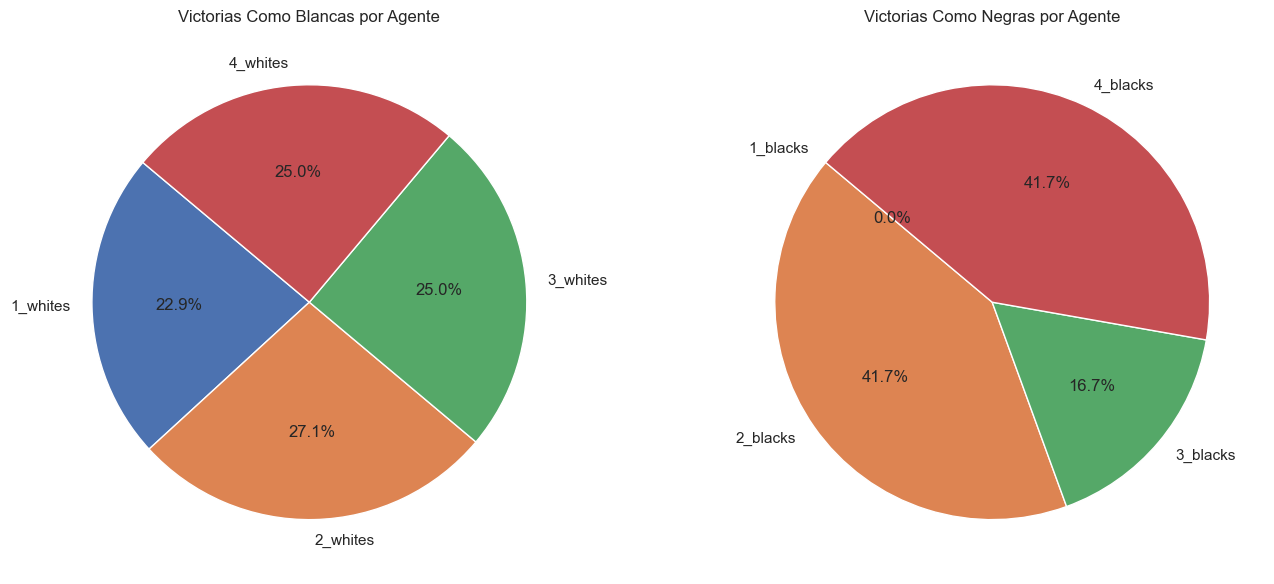

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separar los conteos de victorias para blancas y negras
whites_wins = {k: v for k, v in d1.items() if 'whites' in k}
blacks_wins = {k: v for k, v in d1.items() if 'blacks' in k}

# Crear la figura y los ejes para las gráficas
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gráfica de victorias como blancas
axs[0].pie(whites_wins.values(), labels=whites_wins.keys(), autopct='%1.1f%%', startangle=140)
axs[0].set_title('Victorias Como Blancas por Agente')

# Gráfica de victorias como negras
axs[1].pie(blacks_wins.values(), labels=blacks_wins.keys(), autopct='%1.1f%%', startangle=140)
axs[1].set_title('Victorias Como Negras por Agente')

# Mostrar las gráficas
plt.tight_layout()
plt.show()



In [36]:
d = {}

for a in agentes:
    d['{}_whites'.format(a)] = df[(df['simulations_number_whites'] == agentes[a]['simulations_number']) & (df['exploration_factor_whites'] == agentes[a]['exploration_factor'])]
    d['{}_blacks'.format(a)] = df[(df['simulations_number_blacks'] == agentes[a]['simulations_number']) & (df['exploration_factor_blacks'] == agentes[a]['exploration_factor'])]
    
d

{'1_whites':     simulations_number_whites  exploration_factor_whites  \
 0                         100                        1.0   
 1                         100                        1.0   
 2                         100                        1.0   
 3                         100                        1.0   
 4                         100                        1.0   
 5                         100                        1.0   
 6                         100                        1.0   
 7                         100                        1.0   
 8                         100                        1.0   
 9                         100                        1.0   
 10                        100                        1.0   
 11                        100                        1.0   
 12                        100                        1.0   
 13                        100                        1.0   
 14                        100                        1.0   
 
     simul

In [37]:
d2 = d.copy()

for i in d2:
    
    color = 'blacks'
    
    if 'whites' in i:
        color = 'whites'
    
    d2[i] = d2[i]['chess_pieces_{}'.format(color)].mean()
    
d2

{'1_whites': 4.333333333333333,
 '1_blacks': 3.6666666666666665,
 '2_whites': 3.8666666666666667,
 '2_blacks': 3.6666666666666665,
 '3_whites': 5.4,
 '3_blacks': 3.933333333333333,
 '4_whites': 6.066666666666666,
 '4_blacks': 4.666666666666667}

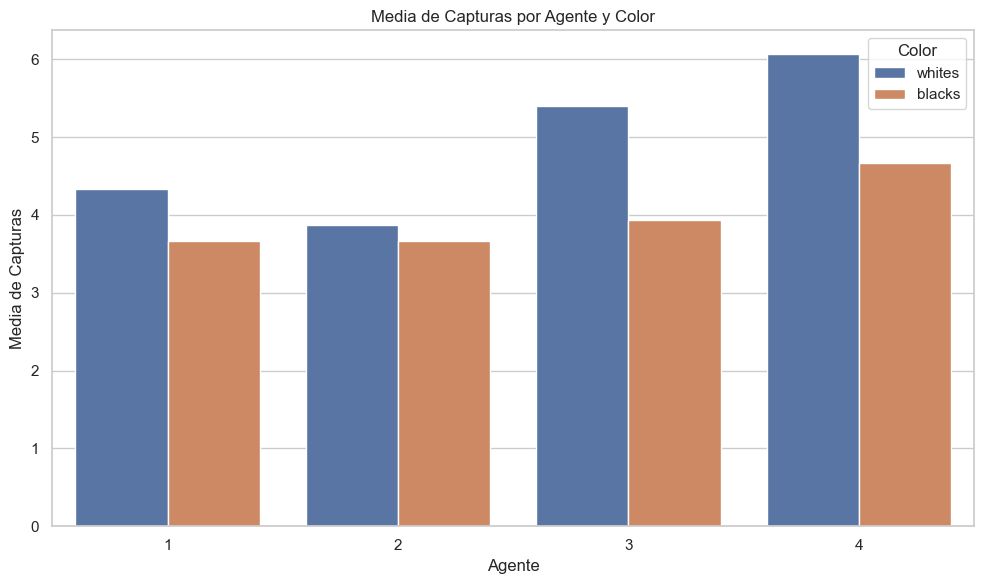

In [38]:
# Convertir el diccionario en un DataFrame para facilitar la visualización
d2_df = pd.DataFrame(list(d2.items()), columns=['Agente_Color', 'Media_Capturas'])

# Separar la información de agente y color en columnas separadas
d2_df[['Agente', 'Color']] = d2_df['Agente_Color'].str.split('_', expand=True)

# Crear una gráfica de barras
plt.figure(figsize=(10, 6))

# Gráfico de barras para mostrar la media de capturas
ax = sns.barplot(x='Agente', y='Media_Capturas', hue='Color', data=d2_df)

plt.title('Media de Capturas por Agente y Color')
plt.xlabel('Agente')
plt.ylabel('Media de Capturas')
plt.legend(title='Color')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [39]:
d3 = d.copy()

for i in d3:
    color = 'blacks'
    
    if 'whites' in i:
        color = 'whites'
    
    d3[i] = d3[i]['average_time_{}'.format(color)].mean()
    
d3

{'1_whites': 0.9928648797733067,
 '1_blacks': 0.7438055917078881,
 '2_whites': 0.7924484677004656,
 '2_blacks': 0.7968042184916196,
 '3_whites': 0.6964698691857342,
 '3_blacks': 0.8327079049202919,
 '4_whites': 0.6725067563623329,
 '4_blacks': 0.7809722579020398}

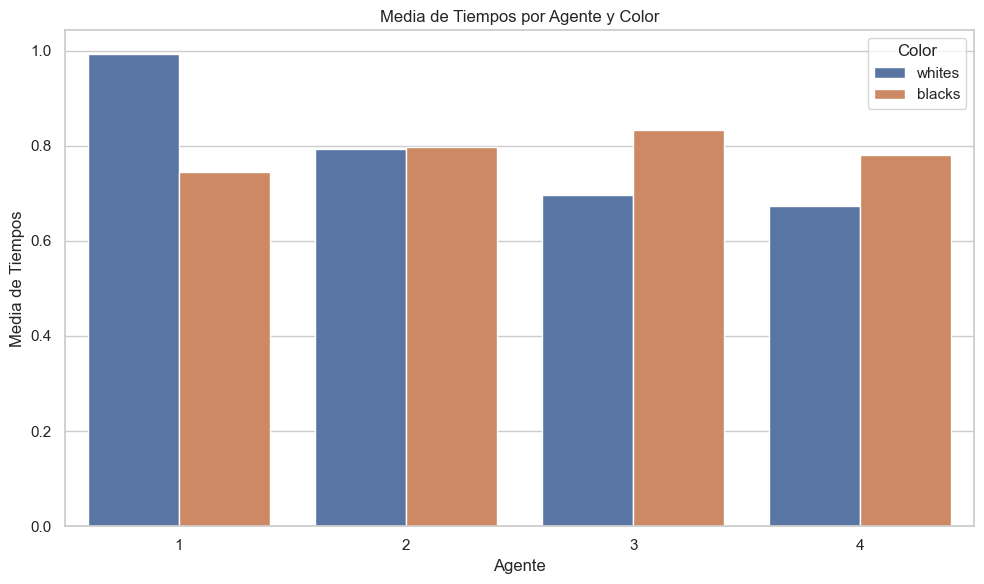

In [40]:
# Convertir el diccionario en un DataFrame para facilitar la visualización
d3_df = pd.DataFrame(list(d3.items()), columns=['Agente_Color', 'Media_Tiempos'])

# Separar la información de agente y color en columnas separadas
d3_df[['Agente', 'Color']] = d3_df['Agente_Color'].str.split('_', expand=True)

# Crear una gráfica de barras
plt.figure(figsize=(10, 6))

# Gráfico de barras para mostrar la media de capturas
ax = sns.barplot(x='Agente', y='Media_Tiempos', hue='Color', data=d3_df)

plt.title('Media de Tiempos por Agente y Color')
plt.xlabel('Agente')
plt.ylabel('Media de Tiempos')
plt.legend(title='Color')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [41]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Define a function to create scatter plots
def create_scatter_plot(data, x_column, y_column, hue_column, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=x_column, y=y_column, hue=hue_column)
    plt.title(title)
    plt.show()


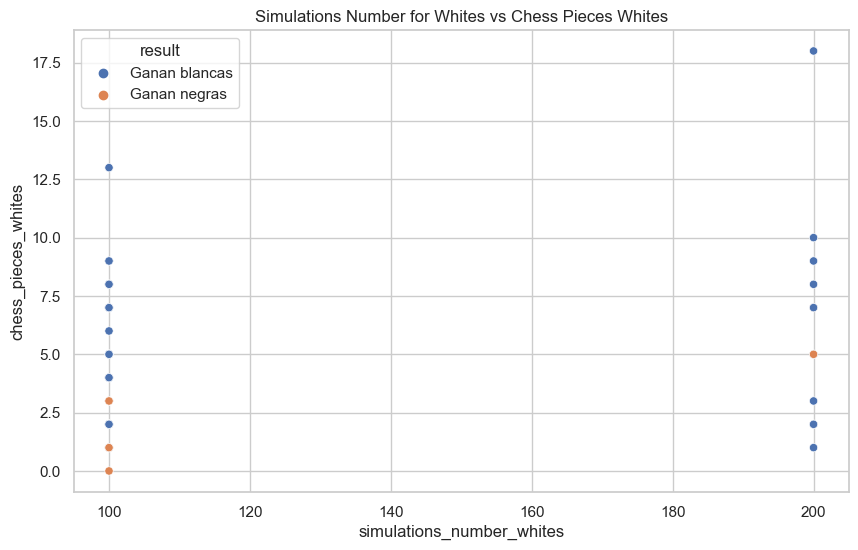

In [42]:
# Plot 1: Simulations number for whites vs Chess pieces whites
create_scatter_plot(df, 'simulations_number_whites', 'chess_pieces_whites', 'result', 
                    'Simulations Number for Whites vs Chess Pieces Whites')

Esta gráfica muestra cómo el número de simulaciones realizadas para las fichas blancas se relaciona con la cantidad de piezas de ajedrez capturadas por las blancas, diferenciando los resultados de las partidas

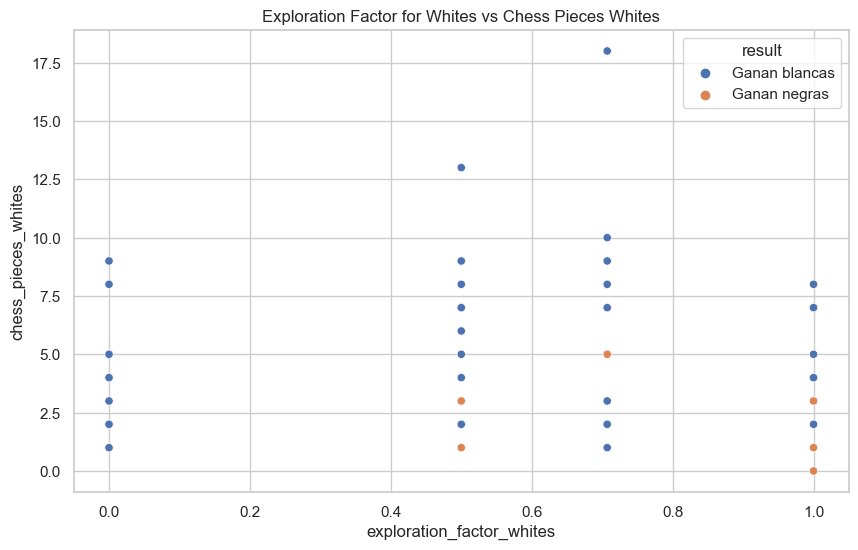

In [43]:
# Plot 2: Exploration factor for whites vs Chess pieces whites
create_scatter_plot(df, 'exploration_factor_whites', 'chess_pieces_whites', 'result', 
                    'Exploration Factor for Whites vs Chess Pieces Whites')

Esta gráfica muestra la relación entre el factor de exploración para las fichas blancas y la cantidad de piezas de ajedrez capturadas por las blancas, también diferenciando los resultados de las partidas.

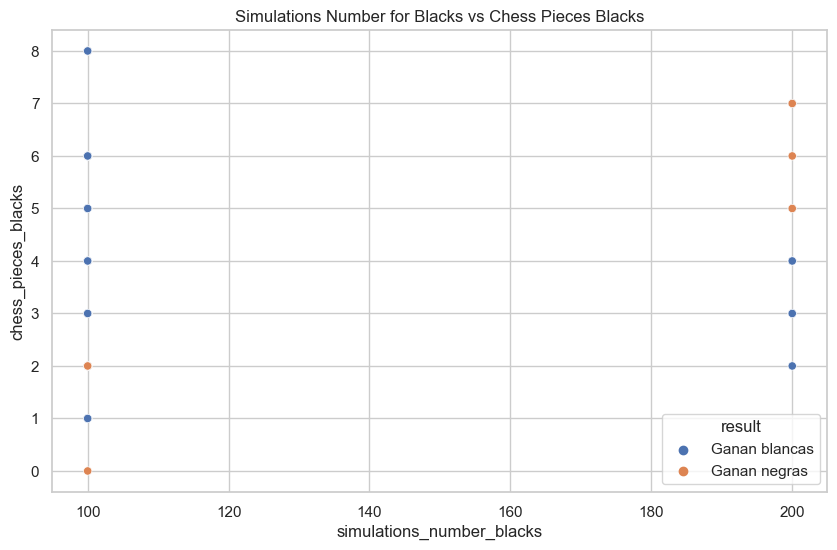

In [44]:
# Plot 3: Simulations number for blacks vs Chess pieces blacks
create_scatter_plot(df, 'simulations_number_blacks', 'chess_pieces_blacks', 'result', 
                    'Simulations Number for Blacks vs Chess Pieces Blacks')

Similar a la primera gráfica, pero para las fichas negras. Muestra cómo el número de simulaciones afecta la cantidad de piezas de ajedrez capturadas las negras al final de la partida.

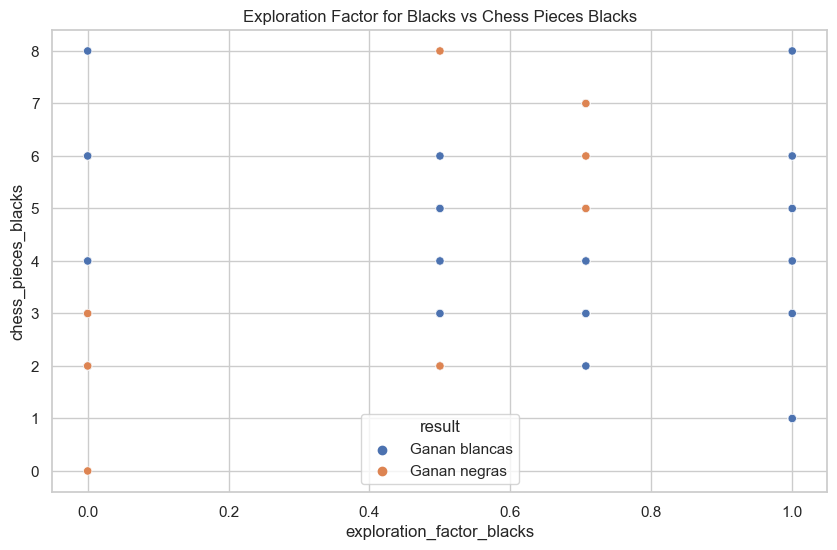

In [45]:
# Plot 4: Exploration factor for blacks vs Chess pieces blacks
create_scatter_plot(df, 'exploration_factor_blacks', 'chess_pieces_blacks', 'result', 
                    'Exploration Factor for Blacks vs Chess Pieces Blacks')

Análoga a la segunda gráfica, pero para las fichas negras. Exhibe la relación entre el factor de exploración y la cantidad de piezas de ajedrez capturadas por las negras, también diferenciando por resultados de partidas.

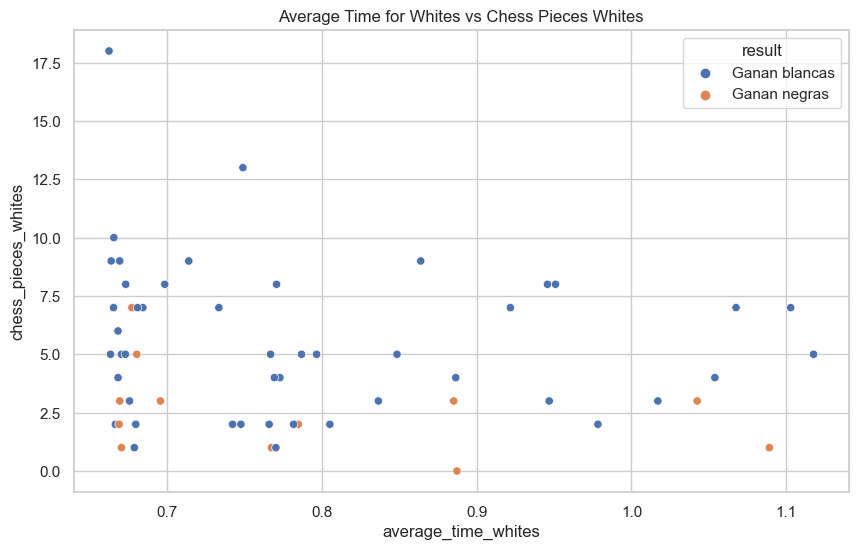

In [46]:
# Plot 5: Average time for whites vs Chess pieces whites
create_scatter_plot(df, 'average_time_whites', 'chess_pieces_whites', 'result', 
                    'Average Time for Whites vs Chess Pieces Whites')

Esta gráfica muestra la relación entre el tiempo promedio de juego para las fichas blancas y la cantidad de piezas de ajedrez capturadas por las blancas al final de la partida. Los diferentes colores representan los distintos resultados de las partidas. Esta gráfica puede ayudar a entender si un juego más largo o más corto beneficia a las blancas en términos de cantidad de piezas restantes o en la probabilidad de ganar la partida.

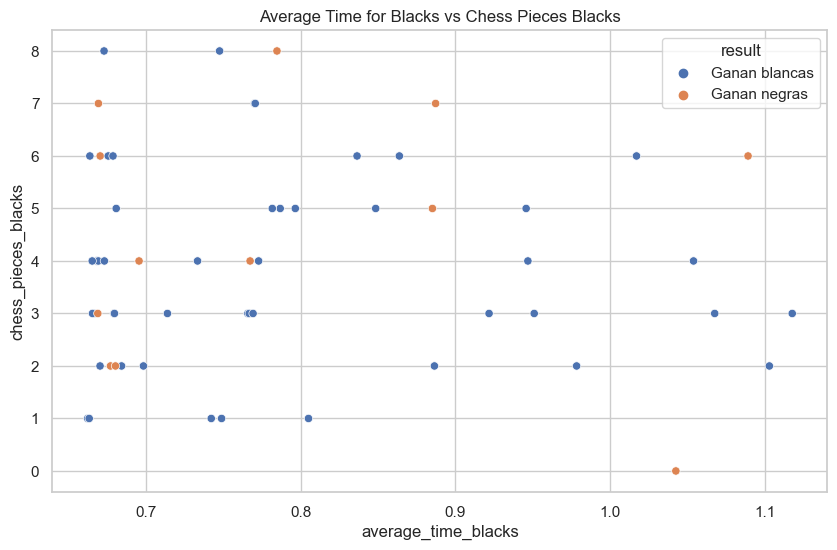

In [47]:
# Plot: Average time for blacks vs Chess pieces blacks
create_scatter_plot(df, 'average_time_blacks', 'chess_pieces_blacks', 'result', 
                    'Average Time for Blacks vs Chess Pieces Blacks')

Similar a la anterior pero para las fichas negras. Muestra cómo el tiempo promedio de juego para las negras se relaciona con la cantidad de piezas de ajedrez capturadas por las negras al final de la partida, también diferenciado por los resultados de las partidas. Esta gráfica es útil para determinar si las partidas más largas o más cortas favorecen a las negras en términos de supervivencia de piezas o victorias.

### Conclusiones

In [48]:
# Function to find the best hyperparameters for winning configurations
def find_best_hyperparameters(data, color):
    # Filter data for winning results for the specified color
    if color == 'whites':
        winning_data = data[data['result'] == 'Ganan blancas']
    elif color == 'blacks':
        winning_data = data[data['result'] == 'Ganan negras']
    else:
        return "Color not recognized"

    # Find the most common values (modes) for each hyperparameter
    best_simulations_number = winning_data[f'simulations_number_{color}'].mode()[0]
    best_exploration_factor = winning_data[f'exploration_factor_{color}'].mode()[0]

    return {
        'best_simulations_number': best_simulations_number,
        'best_exploration_factor': best_exploration_factor
    }

# Find best hyperparameters for whites
best_hyperparameters_whites = find_best_hyperparameters(df, 'whites')

# Find best hyperparameters for blacks
best_hyperparameters_blacks = find_best_hyperparameters(df, 'blacks')

best_hyperparameters_whites, best_hyperparameters_blacks


({'best_simulations_number': 100, 'best_exploration_factor': 0.0},
 {'best_simulations_number': 100, 'best_exploration_factor': 0.0})

Estos valores representan las configuraciones más comunes entre los juegos ganados por las fichas blancas y negras, respectivamente. Para las blancas, parece que un factor de exploración de 0.0 (posiblemente indicando una estrategia más conservadora o enfocada) es más efectivo, mientras que para las negras, un factor de exploración cercano a 0.71 (indicando una estrategia más equilibrada entre exploración y explotación) parece ser más favorable.

Por tanto, la configuración de blancas sería:
* **Número de simulaciones:** 100
* **Factor de exploración:** 0.0

Y para negras sería:
* **Número de simulaciones:** 100
* **Factor de exploración:** 0.7